In [2]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import roberts

In [3]:
fileId = '0001'

In [4]:
filepath = r'D:\Data\cs-8395-dl\assignment3\Training\img\img{}.nii.gz'.format(
    fileId)

In [5]:
img_nib = nib.load(filepath)

In [6]:
img_np =img_nib.get_fdata()

In [7]:
img_np.shape

(512, 512, 147)

In [8]:
img_np.size

38535168

In [9]:
img_np.dtype

dtype('float64')

In [10]:
img_np.max(), img_np.min(), img_np.mean(), np.median(img_np)

(2639.0, -1024.0, -489.53046007221246, -739.0)

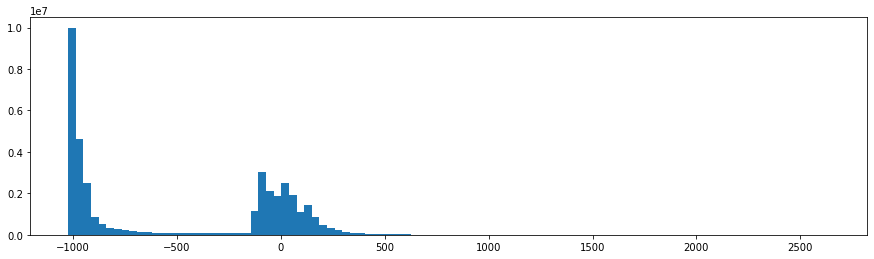

In [11]:
plt.figure(figsize=(15,4))
_=plt.hist(img_np.ravel(),bins=100)

In [12]:
img_np_norm = (img_np-img_np.min())/(img_np.max()-img_np.min())

In [13]:
img_np_norm.max(), img_np_norm.min(), img_np_norm.mean(), np.median(img_np_norm)

(1.0, 0.0, 0.14591033031061654, 0.07780507780507781)

In [14]:
img_np_norm_tr=img_np_norm.transpose((2,0,1))

In [15]:
filepath_label = r'D:\Data\cs-8395-dl\assignment3\Training\label\label{}.nii.gz'.format(fileId)
label_nib = nib.load(filepath_label)

In [17]:
label_np = label_nib.get_fdata()

In [18]:
label_np.shape

(512, 512, 147)

In [19]:
label_np.max(), label_np.min(), np.unique(label_np.ravel())

(13.0,
 0.0,
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13.]))

In [20]:
label_np_tr = label_np.transpose((2,0,1))
label_np_tr.shape

(147, 512, 512)

In [30]:
# starting edge
coord_start = [0,0,0]
# ending edge
coord_end = [0,0,0]
OFFSET=2

for i in range(0,label_np.shape[0],OFFSET):
    if np.sum(label_np[i:i+OFFSET,:,:]==1):
        coord_start[0]=i
        break
for i in range(0,label_np.shape[1],OFFSET):
    if np.sum(label_np[:,i:i+OFFSET,:]==1):
        coord_start[1]=i
        break
for i in range(0,label_np.shape[2],OFFSET):
    if np.sum(label_np[:,:,i:i+OFFSET]==1):
        coord_start[2]=i
        break
for i in range(coord_start[0],label_np.shape[0],OFFSET):
    if np.sum(label_np[i:i+OFFSET,:,:]==1)==0:
        coord_end[0]=i
        break
for i in range(coord_start[1],label_np.shape[1],OFFSET):
    if np.sum(label_np[:,i:i+OFFSET,:]==1)==0:
        coord_end[1]=i
        break
for i in range(coord_start[2],label_np.shape[2],OFFSET):
    if np.sum(label_np[:,:,i:i+OFFSET]==1)==0:
        coord_end[2]=i
        break
        
coord_start, coord_end

([290, 108, 106], [460, 236, 142])

106


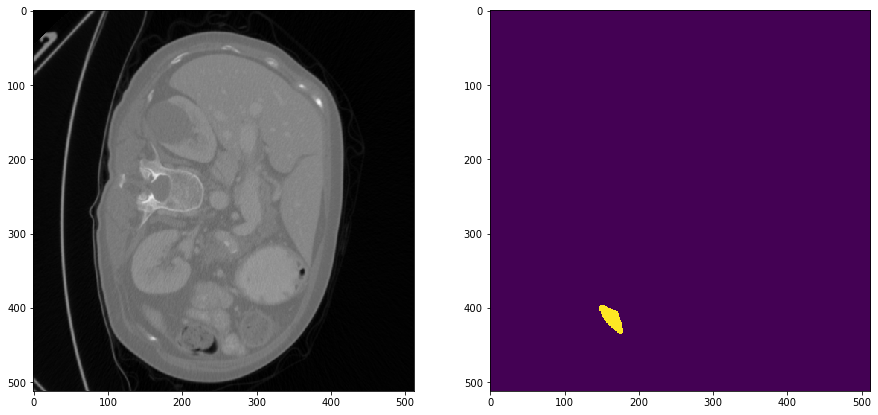

107


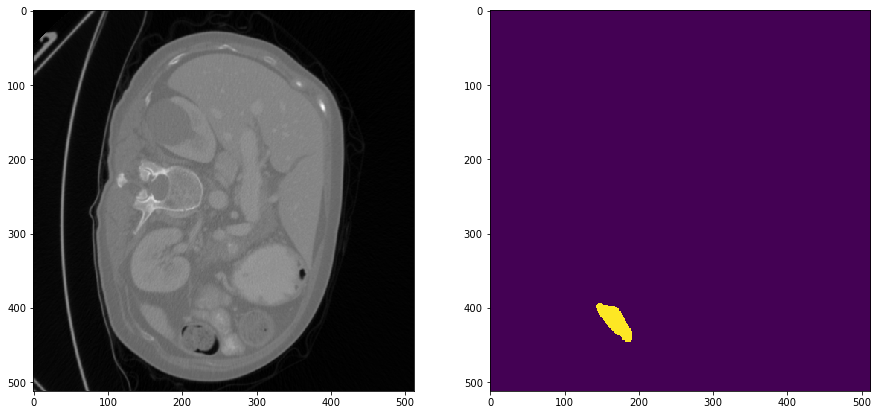

108


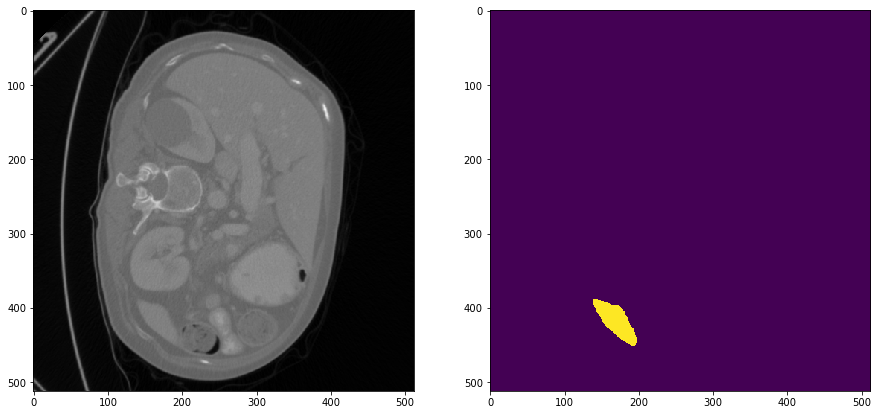

109


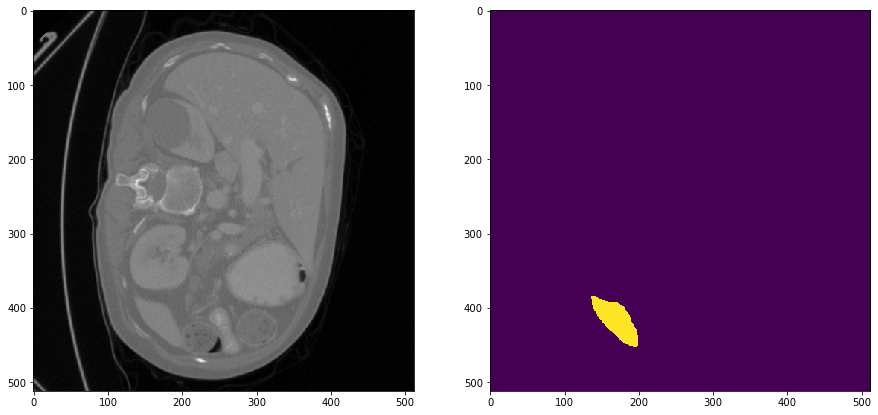

110


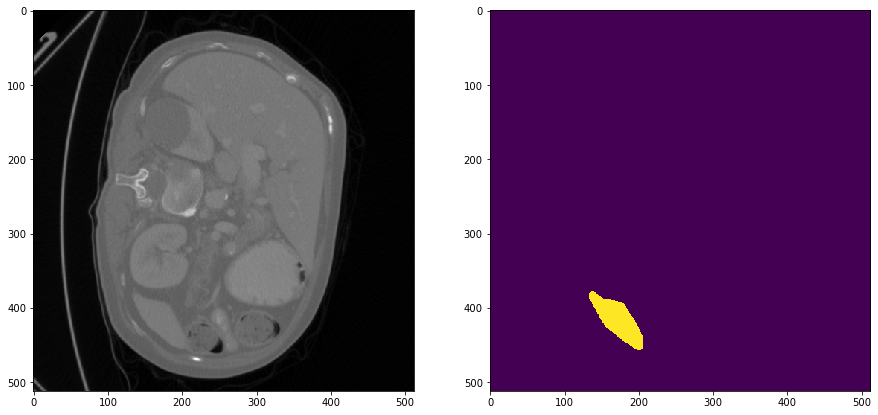

111


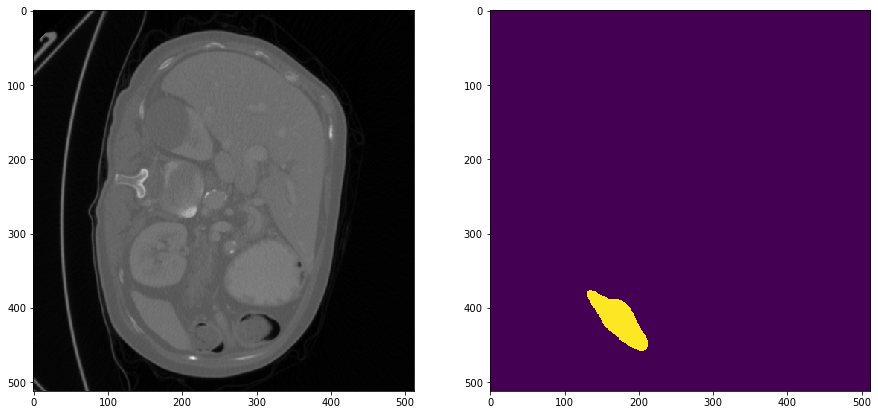

112


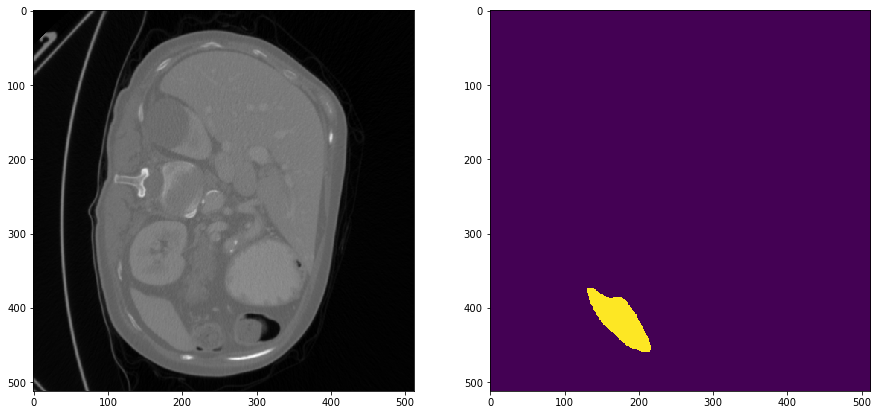

113


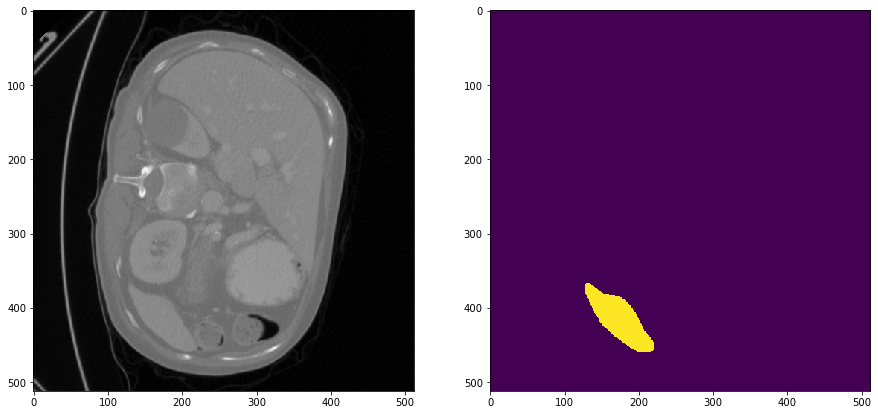

114


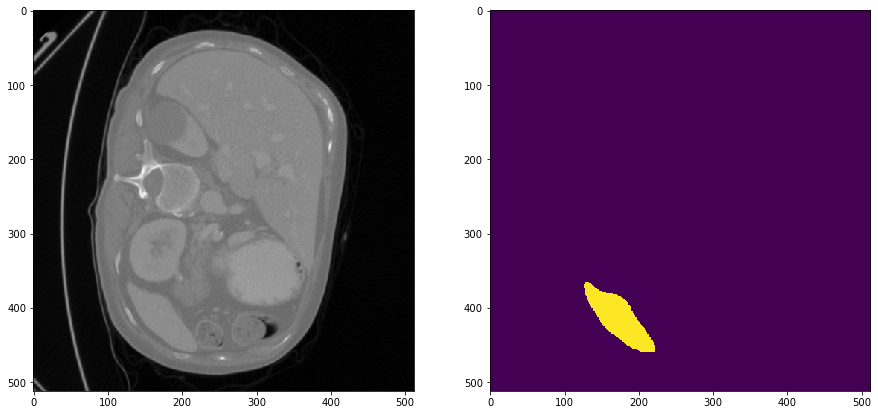

115


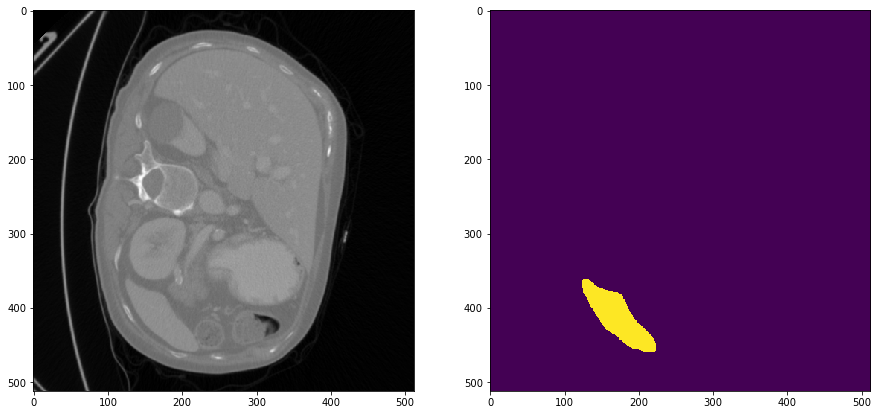

116


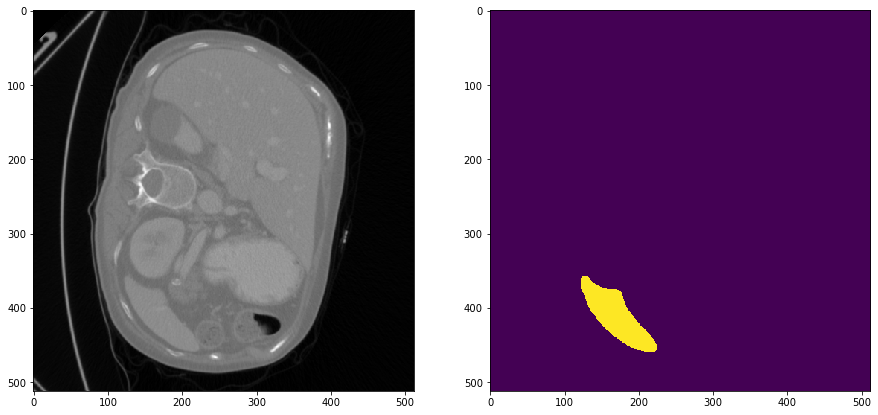

117


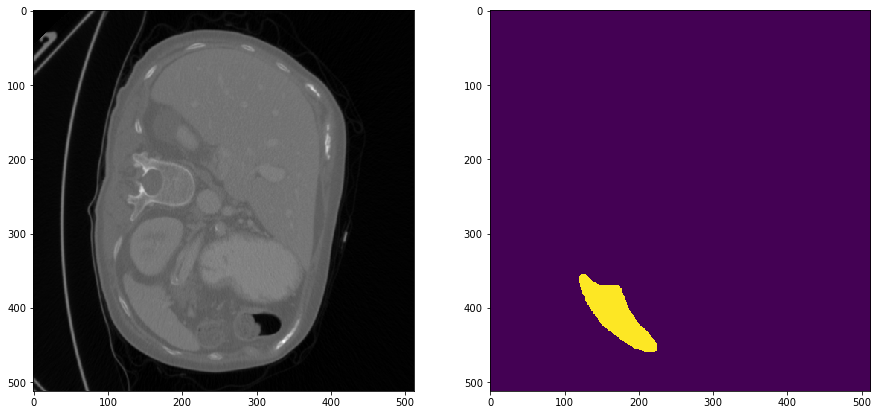

118


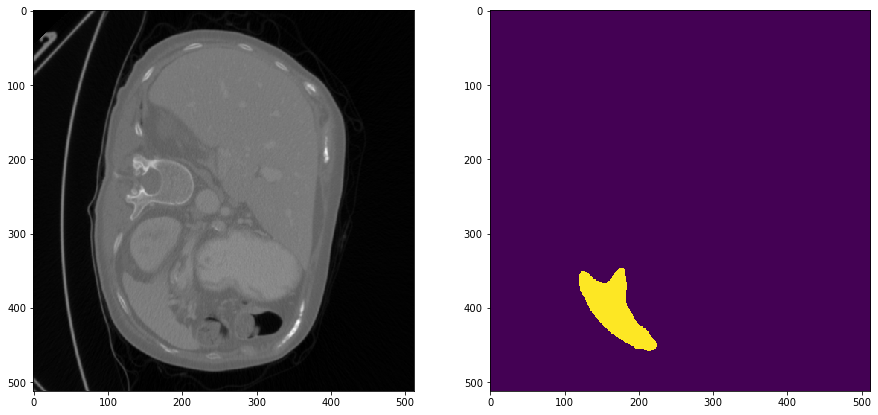

119


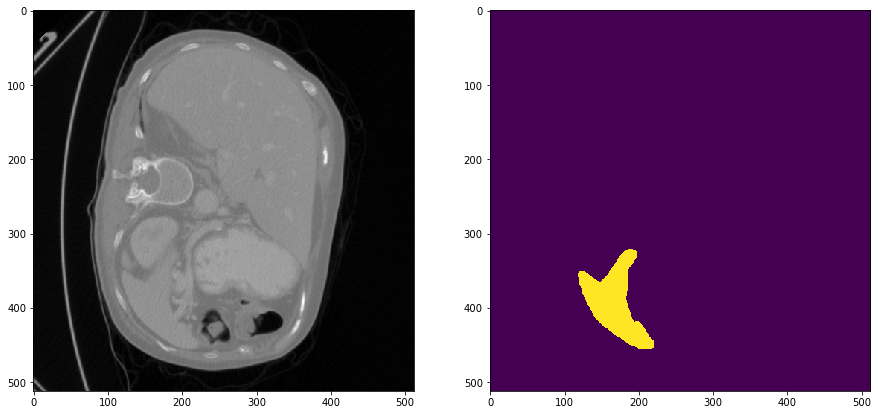

120


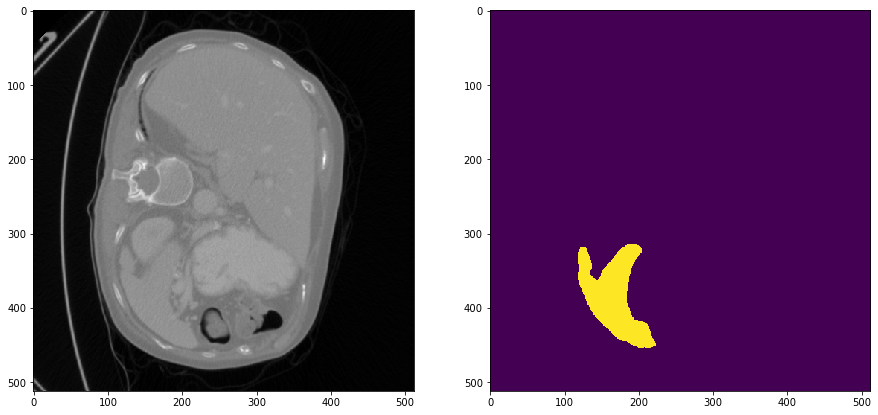

121


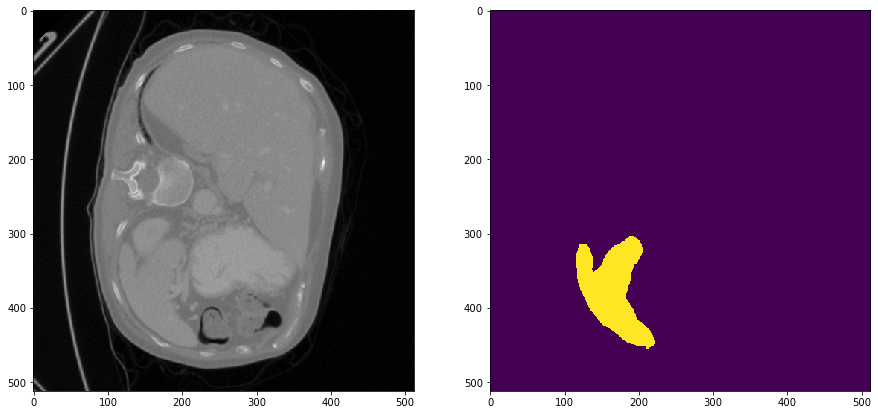

122


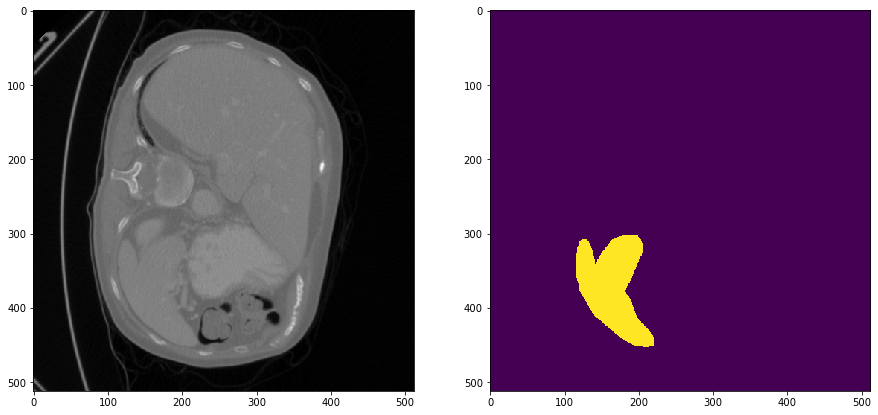

123


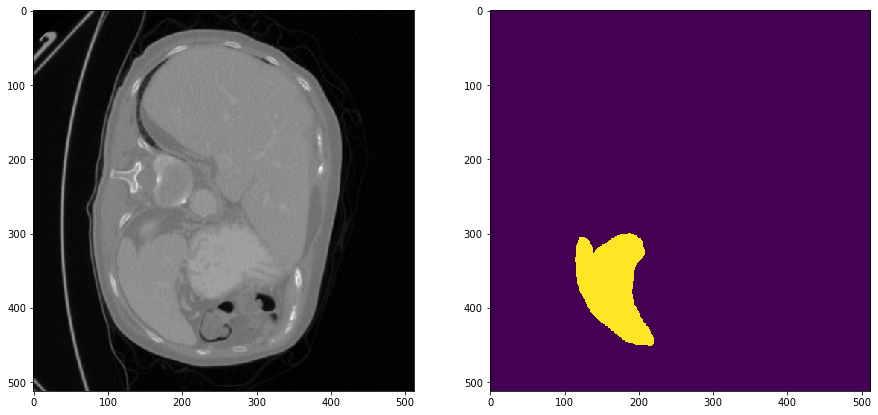

124


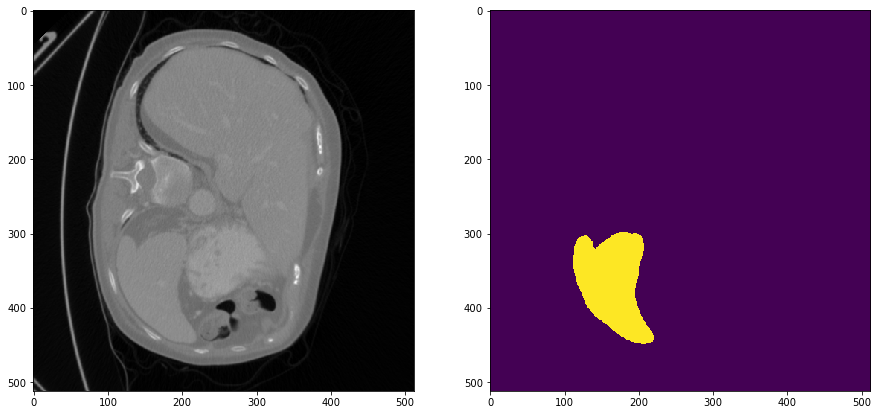

125


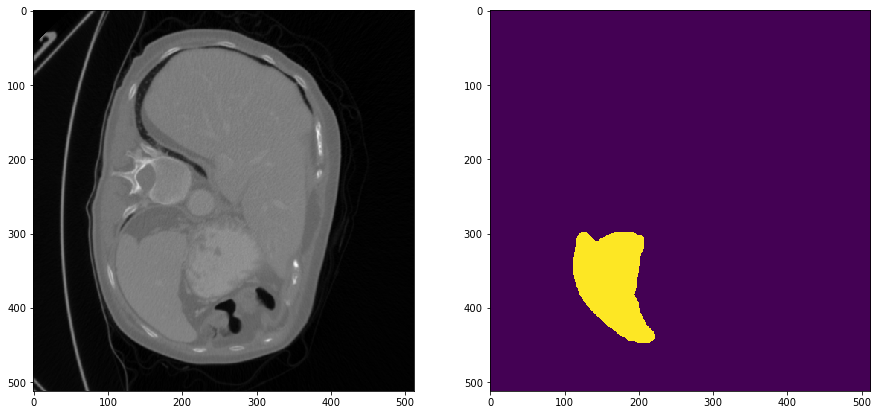

126


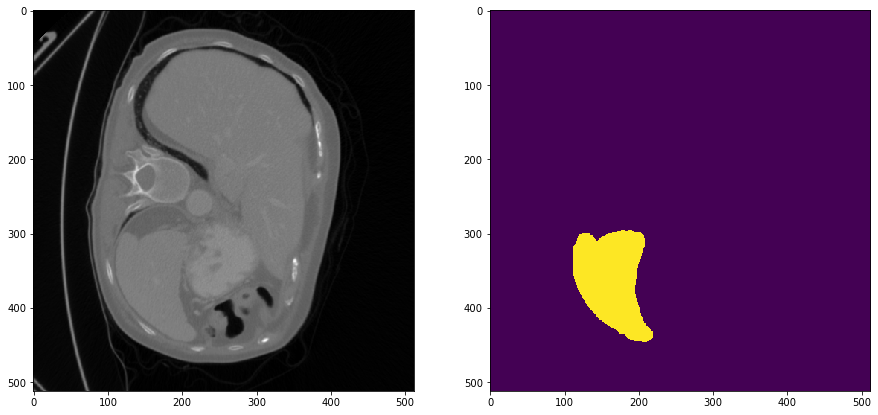

127


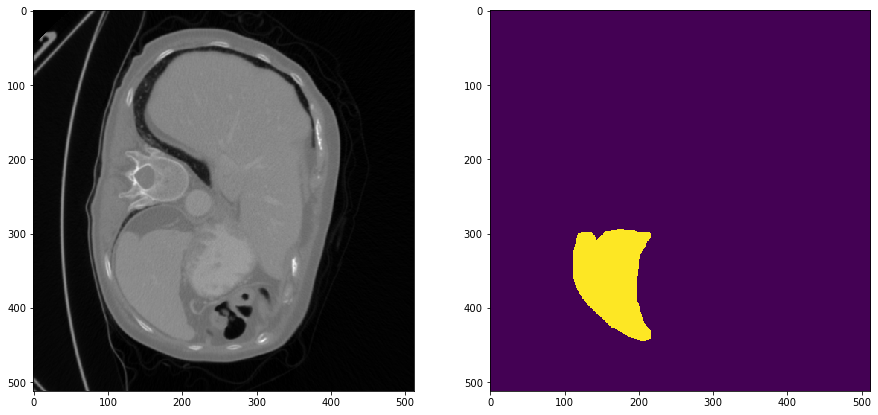

128


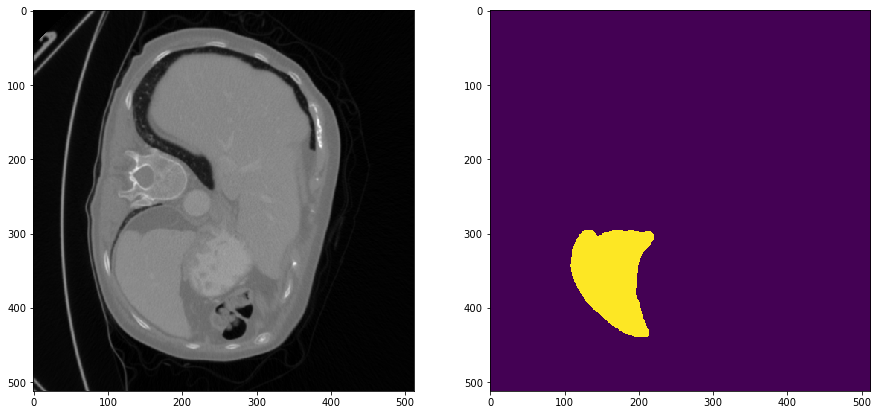

129


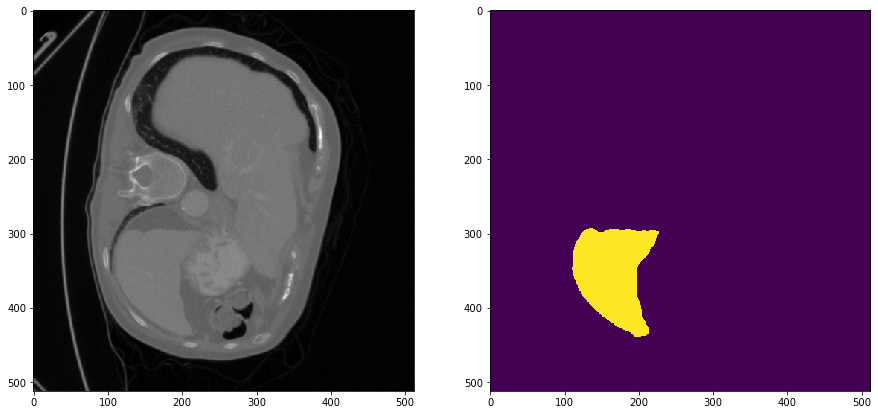

130


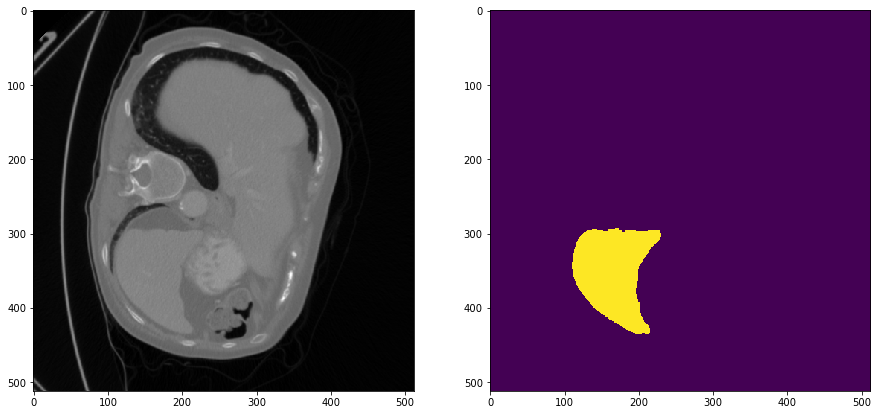

131


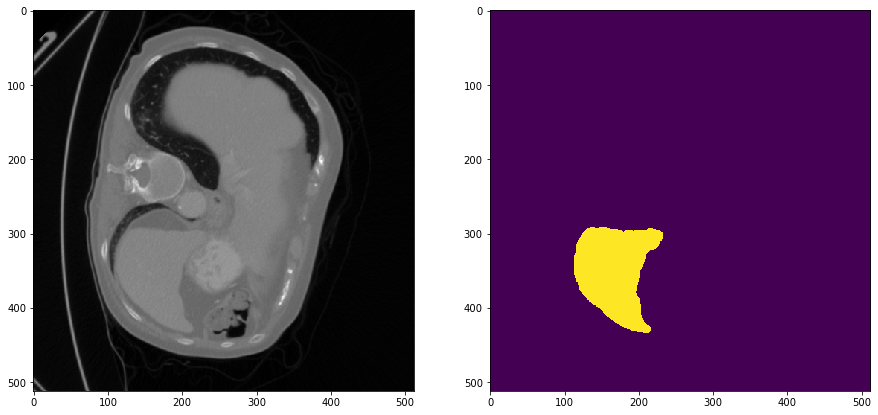

132


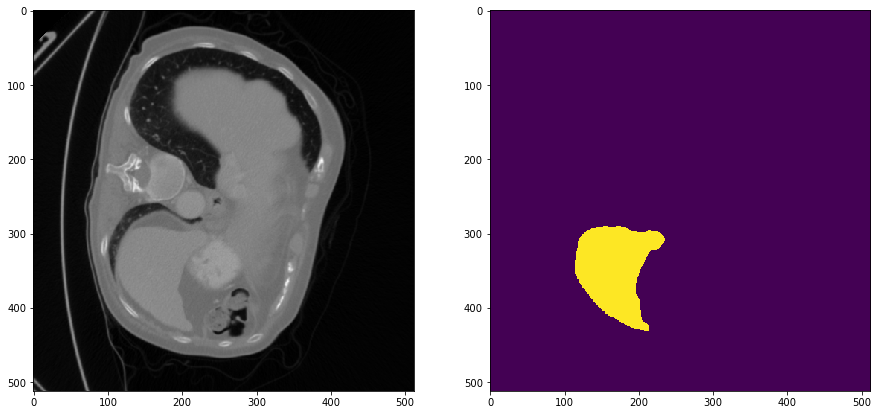

133


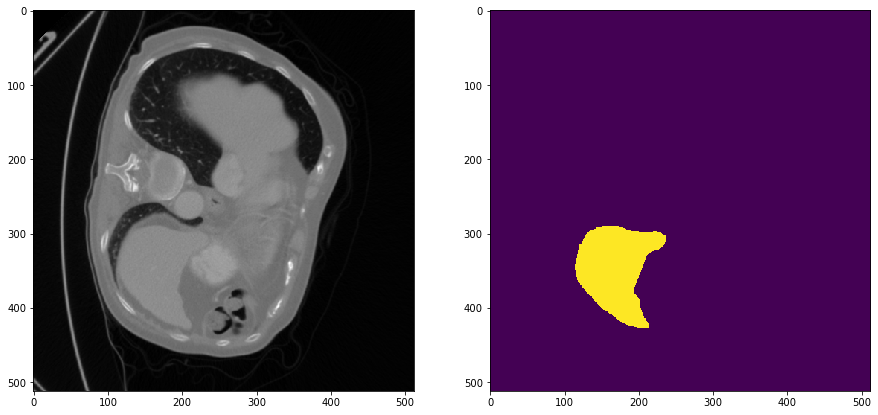

134


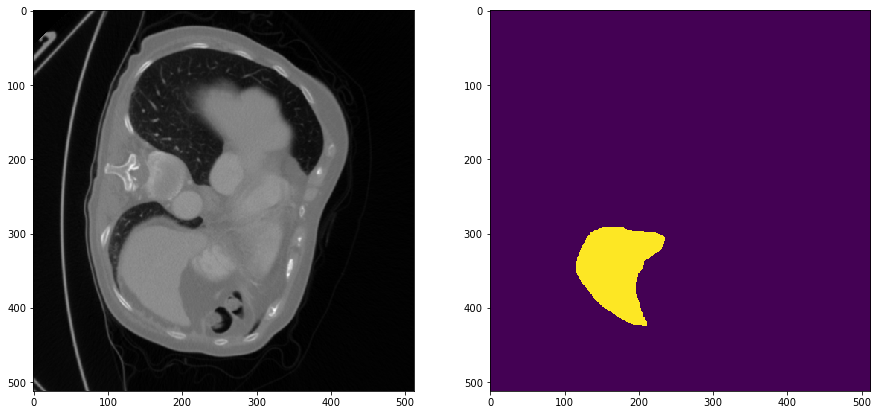

135


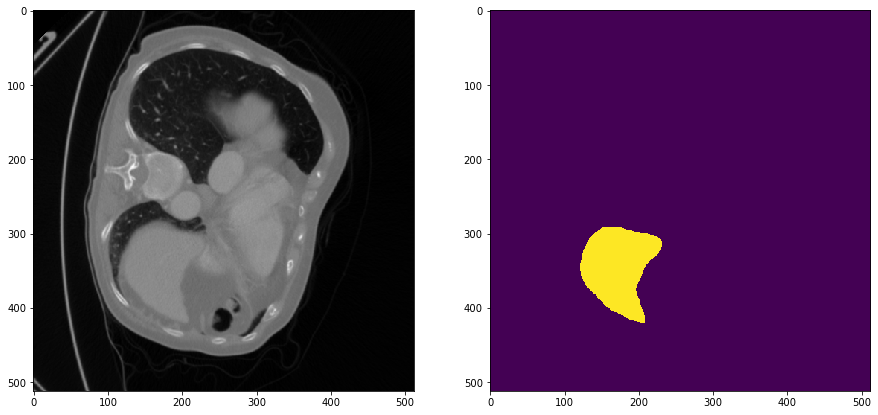

136


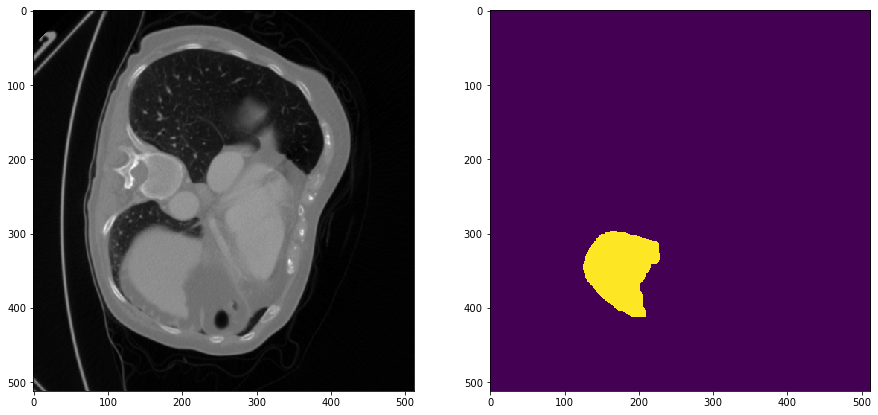

137


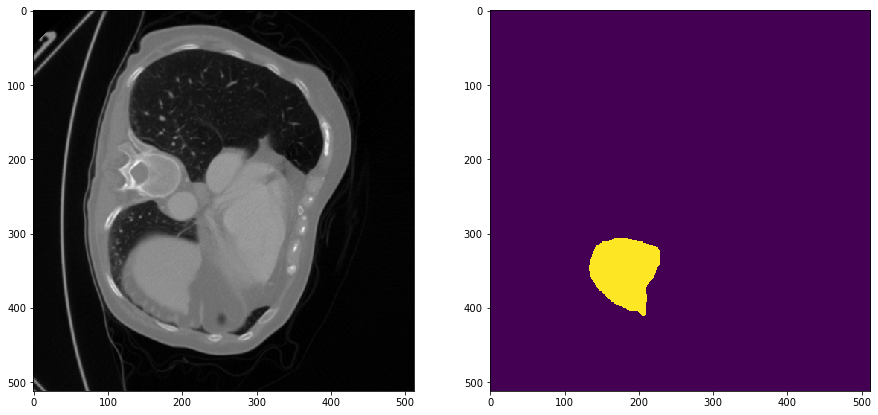

138


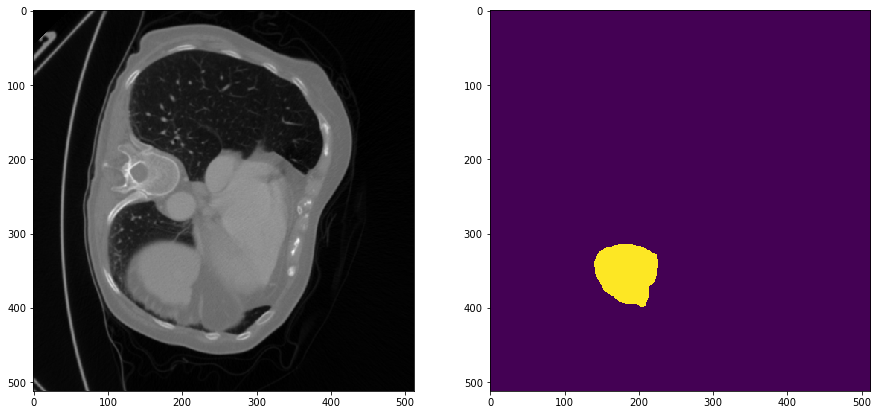

139


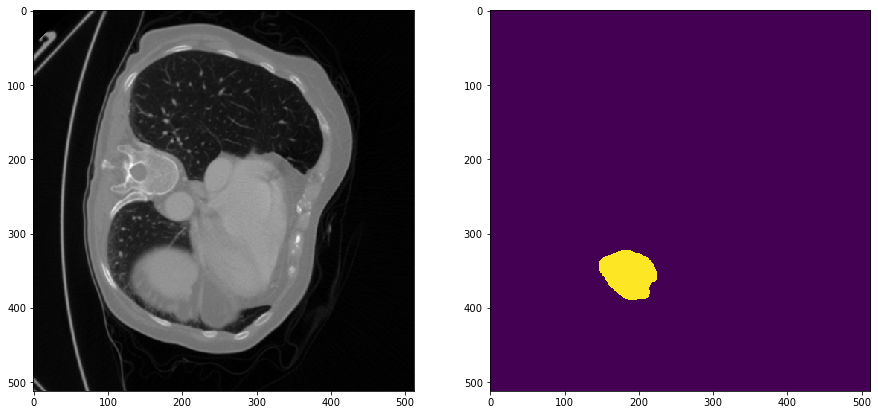

140


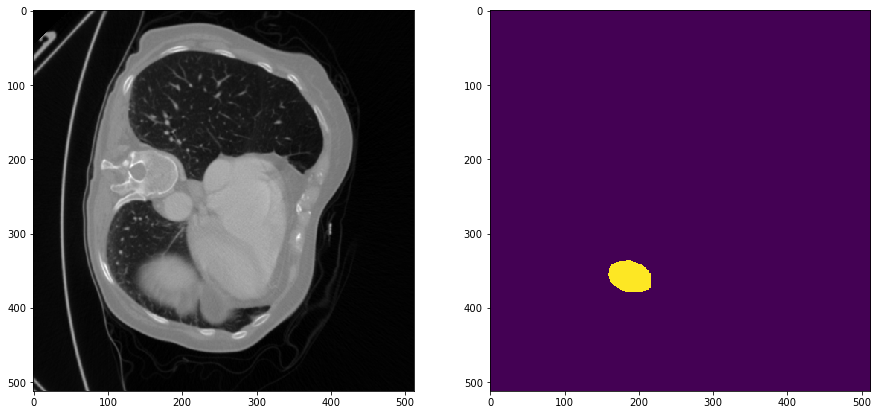

141


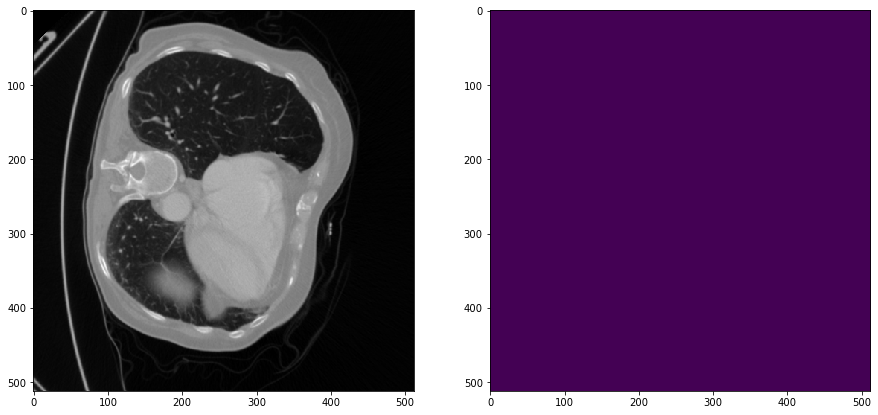

In [32]:
for ind in range(coord_start[2],coord_end[2],1):
    print(ind)
    plt.figure(figsize=(15,15))
    plt.subplot(1,2,1)
    plt.imshow(img_np_norm_tr[ind],cmap='gray')
    plt.subplot(1,2,2)
    label_np_tr_sp = label_np_tr[ind].copy()
    label_np_tr_sp[label_np_tr_sp!=1]=0
    plt.imshow(label_np_tr_sp)
    plt.show()